# HOW TO PLOT A DODECAHEDRON USING PYPLOT

I have found this solution to create a rotating Dodecahedron but it was developed using Python 2.


In [ ]:
import itertools as it
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
v=[p for p in it.product((-1,1),(-1,1),(-1,1))]
g=.5+.5*5**.5
v.extend([p for p in it.product((0,),(-1/g,1/g),(-g,g))])
v.extend([p for p in it.product((-1/g,1/g),(-g,g),(0,))])
v.extend([p for p in it.product((-g,g),(0,),(-1/g,1/g))])
v=np.array(v)
g=[[12,14,5,9,1],[12,1,17,16,0],[12,0,8,4,14],[4,18,19,5,14],[4,8,10,6,18],[5,19,7,11,9],[7,15,13,3,11],[7,19,18,6,15],[6,10,2,13,15],[13,2,16,17,3],[3,17,1,9,11],[16,2,10,8,0]]
a=[2,1,0,3,4,5,0,1,2,3,4,5]
fig = plt.figure()
ax = fig.add_subplot((111),aspect='equal',projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
for f in range(12):
 c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
 c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
 ax.add_collection3d(c)
ax.auto_scale_xyz
plt.show()


I will need to try to adapt it to Python 3, since it does not work at all out of the box. 
This will hopefully let me understand what it does too specifically. 

Let us start from importing all libraries and see if they still exist. 

In [3]:
import itertools as it
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

It does not give me any error while running this, so I am assuming the libraries work. 

Next I will try to define v, which should be the coordinated of the vertices of the 3D polygon

In [20]:
v=[p for p in it.product((-1,1),(-1,1),(-1,1))]
print(v)

[(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1), (1, -1, -1), (1, -1, 1), (1, 1, -1), (1, 1, 1)]


This seems to work fine but I think they are the 8 vertices of a cube. 
Next the script defines a constant g: 

In [5]:
g=.5+.5*5**.5
print(g)

1.618033988749895


To understand what g is, I look at the explanation that the programmer has provided together with the code: 

 - Make vertices, Make edges (based on 3 nearest neighbours, module scipy.spatial.KDtree)
 - Make faces based on graph cycles with length 5 (module networkx)
 - Make facenormals (and select those with outward facing normal, numpy.cross)
 - Generate coloring based on face normals
 - Plotting using matplotlib

It is not immediately clear but I think the constant g is useful to create graph cycles....? 
Let us keep going and see how it is used. 

In [21]:
v.extend([p for p in it.product((0,),(-1/g,1/g),(-g,g))])
print(v)

[(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1), (1, -1, -1), (1, -1, 1), (1, 1, -1), (1, 1, 1), (0, -0.6180339887498948, -1.618033988749895), (0, -0.6180339887498948, 1.618033988749895), (0, 0.6180339887498948, -1.618033988749895), (0, 0.6180339887498948, 1.618033988749895)]


Noted that the attribute .extend works like .append but it adds many items at the end of the list in an iteraritive way, to save time. 
It would be nice what these points in 3D space look like. Let us try to do that.

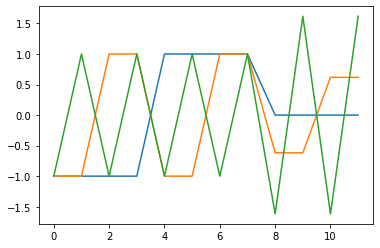

In [15]:
plt.plot(v)

If I plot it in 2D it does not give us any clue what this is about, unfortunately. 

I have to figure out how to plot points in 3D. Let us follow the instructions by mplot3d documentation

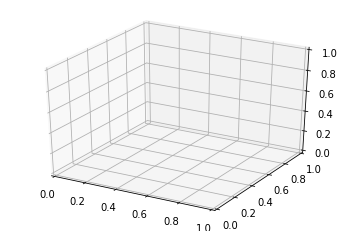

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

I can easily manage to create a 3D space, this is good. Unfortunately this space is only positive, not sure if we will be able to display negative numbers on this. But let us get going. 
I have to import one more module, to follow the introduction from the documentation. Let us try that it works ok: 

In [16]:
from mpl_toolkits.mplot3d import Axes3D

Seems to work. The documentation uses the function Axes3D.scatter() to plot the points in 3D. This function takes 3 different variables, each of them should be passed as a numpy array. Let us try to build the array. 
The original code does simply the following, let us try it:

In [18]:
test_v = np.array(v)
print(test_v)

[[-1.         -1.         -1.        ]
 [-1.         -1.          1.        ]
 [-1.          1.         -1.        ]
 [-1.          1.          1.        ]
 [ 1.         -1.         -1.        ]
 [ 1.         -1.          1.        ]
 [ 1.          1.         -1.        ]
 [ 1.          1.          1.        ]
 [ 0.         -0.61803399 -1.61803399]
 [ 0.         -0.61803399  1.61803399]
 [ 0.          0.61803399 -1.61803399]
 [ 0.          0.61803399  1.61803399]]


This is not exactly what we want and in fact the original code creates an iterative formula to pass these values to the plot. Let us try something else. 
We want each of the three dimensions to be in a numpy array similar to the following: 

In [29]:
dimtest = np.linspace(1,12,12)
print(dimtest)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


I first create an empty array with 12 zeros:

In [39]:
empty = np.zeros(12)
print(empty)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
for i in range(len(empty)):
    empty[i] = v[i][0]
xdim = np.array(empty)
print(xdim)

[-1. -1. -1. -1.  1.  1.  1.  1.  0.  0.  0.  0.]


This seems to have worked. I am not too sure that I can modify the array empty without modifying xdim. Let us try:

In [49]:
empty = np.zeros(12)
for i in range(len(empty)):
    empty[i] = v[i][1]
ydim = np.array(empty)
print(ydim)
print(xdim)

[-1.         -1.          1.          1.         -1.         -1.
  1.          1.         -0.61803399 -0.61803399  0.61803399  0.61803399]
[-1. -1. -1. -1.  1.  1.  1.  1.  0.  0.  0.  0.]


Great, we only miss the xdim: 

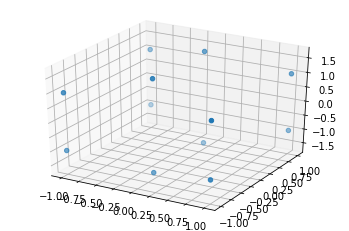

In [50]:
empty = np.zeros(12)
for i in range(len(empty)):
    empty[i] = v[i][2]
zdim = np.array(empty)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdim,ydim,zdim)

This did not help at all! I think I need to try to make the cube look different from the extra dots. Let us see if I can do that. Let us start with the cube only. 

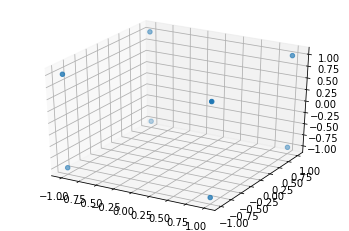

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdim[0:8],ydim[0:8],zdim[0:8])

Good. It is clearly a cube, as I guessed. Let us see if I can add a different scatter and if it shows in a different colour automatically: 

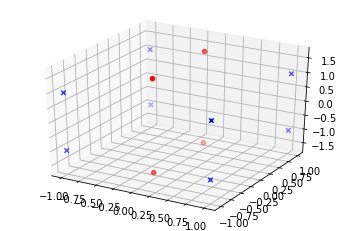

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdim[0:8],ydim[0:8],zdim[0:8], marker='x', color='blue')
ax.scatter(xdim[8:12],ydim[8:12],zdim[8:12], marker='o',color='red')


That is quite cool and very interesting. They seem to be 4 points along a slice plane into the cube. 
Let us go back to extending v, if we can figure out what the coder is trying to do:

In [56]:
v.extend([p for p in it.product((-1/g,1/g),(-g,g),(0,))])
v.extend([p for p in it.product((-g,g),(0,),(-1/g,1/g))])
print(v)

[(-1, -1, -1), (-1, -1, 1), (-1, 1, -1), (-1, 1, 1), (1, -1, -1), (1, -1, 1), (1, 1, -1), (1, 1, 1), (0, -0.6180339887498948, -1.618033988749895), (0, -0.6180339887498948, 1.618033988749895), (0, 0.6180339887498948, -1.618033988749895), (0, 0.6180339887498948, 1.618033988749895), (-0.6180339887498948, -1.618033988749895, 0), (-0.6180339887498948, 1.618033988749895, 0), (0.6180339887498948, -1.618033988749895, 0), (0.6180339887498948, 1.618033988749895, 0), (-1.618033988749895, 0, -0.6180339887498948), (-1.618033988749895, 0, 0.6180339887498948), (1.618033988749895, 0, -0.6180339887498948), (1.618033988749895, 0, 0.6180339887498948)]


let us test again by plotting the whole thing (it is now 20 dots): 

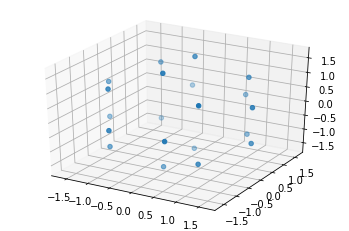

In [57]:
empty = np.zeros(20)
for i in range(len(empty)):
    empty[i] = v[i][0]
xdim = np.array(empty)
for i in range(len(empty)):
    empty[i] = v[i][1]
ydim = np.array(empty)
for i in range(len(empty)):
    empty[i] = v[i][2]
zdim = np.array(empty)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdim,ydim,zdim)


It is not very clear if this is already the final shape with the vertices in the right spot. I don't think so, looking at it. If it was this simple, we could have just input the vertices manually, I guess? 
Anyhow, let us see where the code takes us next: 

In [58]:
v=np.array(v)
g=[[12,14,5,9,1],[12,1,17,16,0],[12,0,8,4,14],[4,18,19,5,14],[4,8,10,6,18],[5,19,7,11,9],[7,15,13,3,11],[7,19,18,6,15],[6,10,2,13,15],[13,2,16,17,3],[3,17,1,9,11],[16,2,10,8,0]]
a=[2,1,0,3,4,5,0,1,2,3,4,5]

So now we have a np array v which is a bunch of vertices in 3D space. The list of list g is 12 lists long and each list is 5 values. This makes me think that each list is a "face" of the dodecahedron and the 5 values are the points the face connects to. The values go from 0 to 19 which means there are in total 20 vertices, which seems correct. Also each vertex shows up 3 times (it links 3 faces) which is also correct. 
The list a is also 12 values long, but in this case the values only go from 0 to 5 so there are 6 in total and each of them repeats twice. Going back to the coder explanation I think these are the "facenormals" and it is only a way to give a different colour to adjacent faces. We can use just 6 colours for the whole dodecahedron, we do not need 12 different colours. This also makes sense now. 
Let us continue. It is time to plot! 

In [59]:
fig = plt.figure()
ax = fig.add_subplot((111),aspect='equal',projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

<Figure size 432x288 with 0 Axes>

This function gives me an error and I think it is because pyplot wants to set up the space limits automatically. I think we can just comment out the axis limit values and it won't matter much anyway. We also need to remove the attribute "aspect" inside the subplot, as it will give an error too. 
This basically brings us back to what we have just done above, in setting a basic 3D space using pyplot:

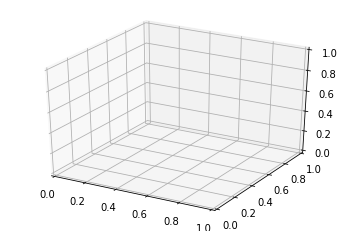

In [61]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')

for f in range(12):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
type(c)

In [62]:
for f in range(12): 
    c = Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1) 

Miracolously this does not give us any error, which is great. I think c is now the plot we are going to pass, we are iterating on each vertex position in 3D space, according to the list g, so that we can create a pentagon for each face. 
To test this hypotesis, let us see if we can just plot the first pentagon. 

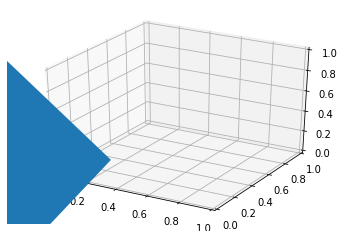

In [63]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
c = Poly3DCollection([[tuple(y) for y in v[g[0],:]]], linewidths=1, alpha=1) 
ax.add_collection3d(c)
plt.show()

I guess it sort of works but it is totally outside the 3D space that we have set up originally. Mmmm.... Let us try a different polygon to see if it is easier:

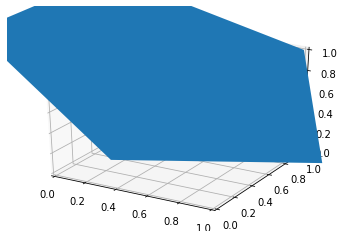

In [68]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
c = Poly3DCollection([[tuple(y) for y in v[g[5],:]]], linewidths=1, alpha=1) 
ax.add_collection3d(c)
plt.show()

Most of them are completely outside the boundaries of the 3D space, I do not understand why this is the case. But a few of them are showing, which I take it as a success. 
Before going ahead with working on the face colours let us try to make a face fit into the 3D space, which is something we may need for later. 

I managed to do this tinkering and going back to the original code. 
It turns out that the attributes set_xlim3d for all of the 3 dimensions were ok and did not throw an error, the problem was only with the "aspect" attribute, which has probably been discontinuted in Python 3

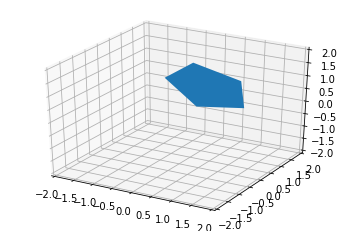

In [72]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
c = Poly3DCollection([[tuple(y) for y in v[g[5],:]]], linewidths=1, alpha=1) 
ax.add_collection3d(c)



Now that this is clear, let us see if we can get the whole dodecahedron before we delve into the colouring of faces. 

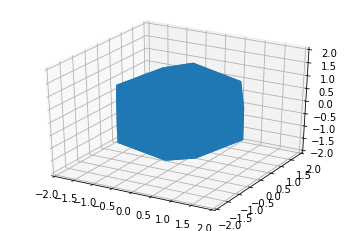

In [73]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
for f in range(12):
    c = Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1) 
    ax.add_collection3d(c)


I think it sort of works but we cannot see it clearly, hence the need of the face colouring. This simple test also has shown that we do not really need the attribute of autoscale_xyz that the programmer used in the original code. 
Let us now try to add the colouring bit:

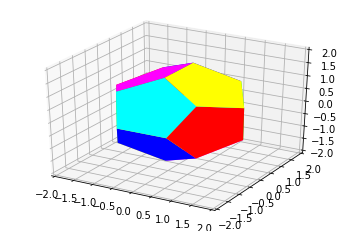

In [74]:
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
for f in range(12):
    c = Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1) 
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)

Success! It is really odd that the solid is not sitting on a pentagon on the x-axis, I am not really sure why they have drawn the points this way, but it seems to have done the trick.
The final cleaned up code is therefore: 

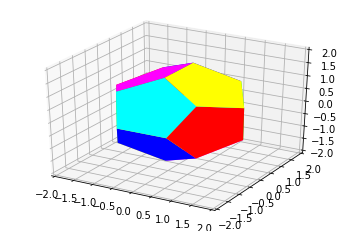

In [75]:
import itertools as it
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

v=[p for p in it.product((-1,1),(-1,1),(-1,1))]
g=.5+.5*5**.5
v.extend([p for p in it.product((0,),(-1/g,1/g),(-g,g))])
v.extend([p for p in it.product((-1/g,1/g),(-g,g),(0,))])
v.extend([p for p in it.product((-g,g),(0,),(-1/g,1/g))])
v=np.array(v)
g=[[12,14,5,9,1],[12,1,17,16,0],[12,0,8,4,14],[4,18,19,5,14],[4,8,10,6,18],[5,19,7,11,9],[7,15,13,3,11],[7,19,18,6,15],[6,10,2,13,15],[13,2,16,17,3],[3,17,1,9,11],[16,2,10,8,0]]
a=[2,1,0,3,4,5,0,1,2,3,4,5]

fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
for f in range(12):
    c=Poly3DCollection([[tuple(y) for y in v[g[f],:]]], linewidths=1, alpha=1)
    c.set_facecolor([(0,0,1),(0,1,0),(0,1,1),(1,0,0),(1,0,1),(1,1,0)][a[f]])
    ax.add_collection3d(c)

plt.show()